<a href="https://colab.research.google.com/github/shashwat9kumar/repository/blob/master/Covid_face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls /content/drive/MyDrive/Kaggle/Masks_Dataset

link.txt  Test	Train  Validation


In [2]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [3]:
!pwd

/content/drive/MyDrive/Kaggle


### Checking out the directory structure

In [4]:
import os

for root, dirs, files in os.walk("Masks_Dataset"):
    print(f"There are {len(dirs)} directories and {len(files)} files in {root}")

There are 3 directories and 1 files in Masks_Dataset
There are 2 directories and 0 files in Masks_Dataset/Test
There are 0 directories and 50 files in Masks_Dataset/Test/Mask
There are 0 directories and 50 files in Masks_Dataset/Test/Non_Mask
There are 2 directories and 0 files in Masks_Dataset/Train
There are 0 directories and 300 files in Masks_Dataset/Train/Mask
There are 0 directories and 300 files in Masks_Dataset/Train/Non_Mask
There are 2 directories and 0 files in Masks_Dataset/Validation
There are 0 directories and 153 files in Masks_Dataset/Validation/Mask
There are 0 directories and 153 files in Masks_Dataset/Validation/Non_Mask


### Checking out how may files/images we have in each set (train, test and validation)

In [5]:
print(f"There are {len(os.listdir('/content/drive/MyDrive/Kaggle/Masks_Dataset/Train/Mask'))} images of masks in training dataset")
print(f"There are {len(os.listdir('/content/drive/MyDrive/Kaggle/Masks_Dataset/Train/Non_Mask'))} images of masks in training dataset")
print()

print(f"There are {len(os.listdir('/content/drive/MyDrive/Kaggle/Masks_Dataset/Test/Mask'))} images of masks in test dataset")
print(f"There are {len(os.listdir('/content/drive/MyDrive/Kaggle/Masks_Dataset/Test/Mask'))} images of masks in test dataset")
print()

print(f"There are {len(os.listdir('/content/drive/MyDrive/Kaggle/Masks_Dataset/Validation/Mask'))} images of masks in validation dataset")
print(f"There are {len(os.listdir('/content/drive/MyDrive/Kaggle/Masks_Dataset/Validation/Mask'))} images of masks in validation dataset")

There are 300 images of masks in training dataset
There are 300 images of masks in training dataset

There are 50 images of masks in test dataset
There are 50 images of masks in test dataset

There are 153 images of masks in validation dataset
There are 153 images of masks in validation dataset


### Storing all the classes of our dataset

In [6]:
import numpy as np

class_names = np.array(sorted(os.listdir('/content/drive/MyDrive/Kaggle/Masks_Dataset/Train')))
class_names

array(['Mask', 'Non_Mask'], dtype='<U8')

### Create a function to list random images

In [7]:
import random
import matplotlib.pyplot as plt

def plot_random_image(directory, class_names):
    """
    To plot 1 random image from all the classes of the directory specified
    """

    plt.figure(figsize=(10,10))

    total = len(class_names)
    for i in range(total):
        image_path = directory + "/" + class_names[i]
        random_image = random.sample(os.listdir(image_path), 1)
        image_path = image_path + "/" + random_image[0]
        image = plt.imread(image_path)

        plt.subplot(1, total, (i+1))
        plt.imshow(image)
        plt.axis(False)
        plt.title(f"{class_names[i]}", fontsize=20)

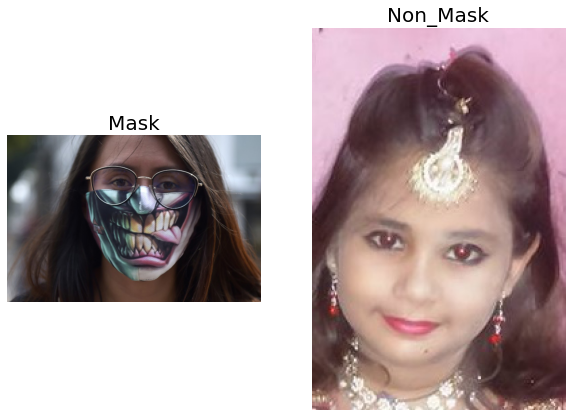

In [8]:
# plotting random images from train dataset

plot_random_image(directory = "/content/drive/MyDrive/Kaggle/Masks_Dataset/Train", class_names = class_names)

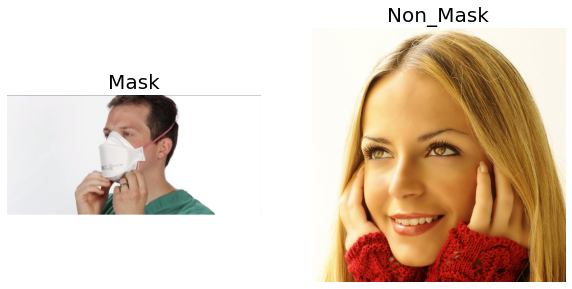

In [9]:
# plotting random images from test dataset

plot_random_image(directory = "/content/drive/MyDrive/Kaggle/Masks_Dataset/Test", class_names = class_names)

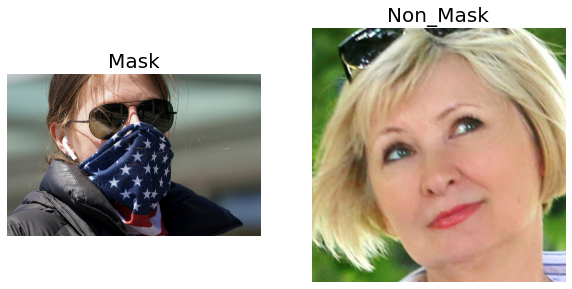

In [10]:
# plotting random images from validation dataset

plot_random_image(directory = "/content/drive/MyDrive/Kaggle/Masks_Dataset/Validation", class_names = class_names)

### Finding the range and shape of images (0-255)

In [11]:
random_image = random.sample(os.listdir("/content/drive/MyDrive/Kaggle/Masks_Dataset/Train/Mask"), 1)
image = plt.imread("/content/drive/MyDrive/Kaggle/Masks_Dataset/Train/Mask" + "/" + random_image[0])
print(image.shape)
print("Max: ", image.max()) 
print("Min: " ,image.min())

(1024, 768, 3)
Max:  255
Min:  0


In [12]:
random_image = random.sample(os.listdir("/content/drive/MyDrive/Kaggle/Masks_Dataset/Train/Mask"), 1)
image = plt.imread("/content/drive/MyDrive/Kaggle/Masks_Dataset/Train/Mask" + "/" + random_image[0])
print(image.shape)
print("Max: ", image.max()) 
print("Min: " ,image.min())

(2184, 1050, 3)
Max:  255
Min:  0


### Preparing the data for the model

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# Setting random seed
tf.random.set_seed(42)


# Storing train, test and validation dataset directory
train_dir = "/content/drive/MyDrive/Kaggle/Masks_Dataset/Train"
test_dir = "/content/drive/MyDrive/Kaggle/Masks_Dataset/Test"
valid_dir = "/content/drive/MyDrive/Kaggle/Masks_Dataset/Validation"


# Instantiating the ImageDataGenerator for train, test and validation dataset
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1/255.,
                                  width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale=1/255.,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip = True)


# Getting data from DataGenerator
train_data = train_datagen.flow_from_directory(directory=  train_dir,
                                               target_size= (512, 512),
                                               class_mode= 'binary',
                                               batch_size= 32,
                                               shuffle= True,
                                            #    seed= 42
                                               )

test_data = test_datagen.flow_from_directory(directory=  test_dir,
                                             target_size= (512, 512),
                                             class_mode= 'binary',
                                             batch_size= 32,
                                             shuffle= True,
                                            #  seed= 42
                                             )

valid_data = valid_datagen.flow_from_directory(directory=  valid_dir,
                                               target_size= (512, 512),
                                               class_mode= 'binary',
                                               batch_size= 32,
                                               shuffle= True,
                                            #    seed= 42
                                               )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


### Checking out randon images after data augmentation

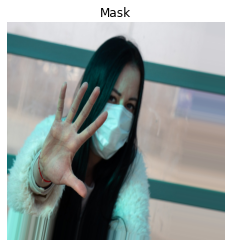

In [15]:
images, labels = train_data.next()
random_number = random.sample(range(len(images)), 1)[0]
plt.imshow(images[random_number])
plt.title(class_names[int(labels[random_number])])
plt.axis(False);

### Creating a model and finding a good learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.MaxPool2D(),

     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.MaxPool2D(),

     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.MaxPool2D(),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)


# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.000001),
                metrics=["accuracy"])
#lr Schedular
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[lr_scheduler])

Epoch 1/50
19/19 [==============================] - 19s 980ms/step - loss: 0.6912 - accuracy: 0.5233 - val_loss: 0.6861 - val_accuracy: 0.5000
Epoch 2/50
19/19 [==============================] - 17s 926ms/step - loss: 0.6775 - accuracy: 0.6133 - val_loss: 0.6661 - val_accuracy: 0.5425
Epoch 3/50
19/19 [==============================] - 17s 926ms/step - loss: 0.6405 - accuracy: 0.6517 - val_loss: 0.6092 - val_accuracy: 0.7451
Epoch 4/50
19/19 [==============================] - 17s 920ms/step - loss: 0.5507 - accuracy: 0.7867 - val_loss: 0.5200 - val_accuracy: 0.7778
Epoch 5/50
19/19 [==============================] - 17s 915ms/step - loss: 0.4155 - accuracy: 0.8483 - val_loss: 0.4441 - val_accuracy: 0.8137
Epoch 6/50
19/19 [==============================] - 17s 919ms/step - loss: 0.3521 - accuracy: 0.8650 - val_loss: 0.3875 - val_accuracy: 0.8268
Epoch 7/50
19/19 [==============================] - 17s 918ms/step - loss: 0.3679 - accuracy: 0.8367 - val_loss: 0.4153 - val_accuracy: 0.8072

Text(0.5, 1.0, 'Loss')

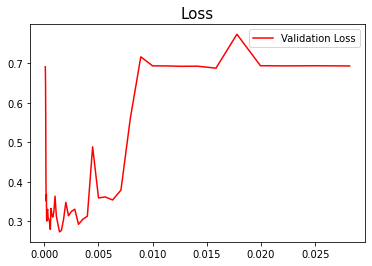

In [ ]:
lr = history_1.history["lr"]
epochs = range(len(lr))
plt.plot(lr, history_1.history["loss"], label = "Learning rate", color='red')
plt.legend()
plt.title("Learning rate vs Epochs", fontsize=15)

In [ ]:
model_1.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_225 (Conv2D)          (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_227 (Conv2D)          (None, 218, 218, 10)      910       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 109, 109, 10)      0         
_________________________________________________________________
conv2d_228 (Conv2D)          (None, 107, 107, 10)      910       
_________________________________________________________________
conv2d_229 (Conv2D)          (None, 105, 105, 10)      910       
_________________________________________________________________
conv2d_230 (Conv2D)          (None, 103, 103, 10)    

### Plotting the loss curves using a function

In [16]:
def plot_loss_and_accuracy(history):
    """
    Plot the training loss and validation loss 
    and the training accuracy and validation loss
    """
    loss = history.history["loss"]
    accuracy = history.history["accuracy"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(loss))

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label = "Training Loss", color='green')
    plt.plot(epochs, val_loss, label = "Validation Loss", color='red')
    plt.legend()
    plt.title("Loss", fontsize=15)

    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label = "Training Accuracy", color='green')
    plt.plot(epochs, val_accuracy, label = "Validation Accuracy", color='red')
    plt.legend()
    plt.title("Accuracy", fontsize=15)
    plt.show();

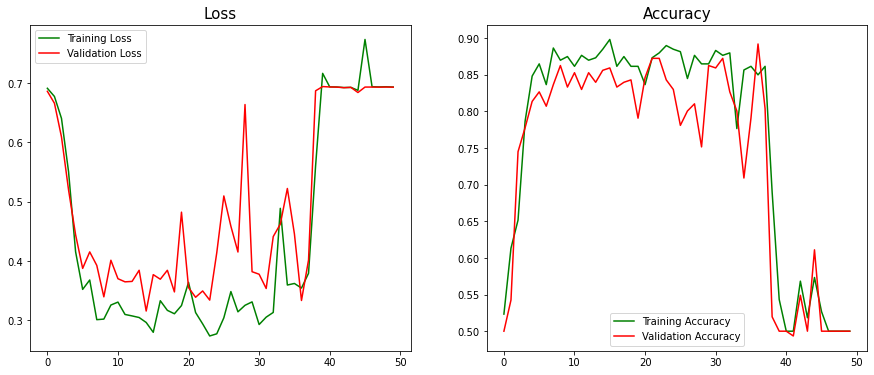

In [ ]:
plot_loss_and_accuracy(history_1)

### Creating a model

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(512, 512, 3)),
    #  tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.MaxPool2D(),

     tf.keras.layers.Conv2D(10, 3, activation="relu"),
    #  tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.MaxPool2D(),

     tf.keras.layers.Conv2D(10, 3, activation="relu"),
    #  tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.MaxPool2D(),

     tf.keras.layers.Conv2D(10, 3, activation="relu"),
    #  tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.Conv2D(10, 3, activation="relu"),
     tf.keras.layers.MaxPool2D(),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)


# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])


# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/20
19/19 [==============================] - 405s 20s/step - loss: 0.6875 - accuracy: 0.6100 - val_loss: 0.6819 - val_accuracy: 0.7059
Epoch 2/20
19/19 [==============================] - 50s 3s/step - loss: 0.6711 - accuracy: 0.7117 - val_loss: 0.6668 - val_accuracy: 0.7353
Epoch 3/20
19/19 [==============================] - 50s 3s/step - loss: 0.6332 - accuracy: 0.7733 - val_loss: 0.6297 - val_accuracy: 0.7614
Epoch 4/20
19/19 [==============================] - 50s 3s/step - loss: 0.5699 - accuracy: 0.8200 - val_loss: 0.5783 - val_accuracy: 0.7353
Epoch 5/20
19/19 [==============================] - 50s 3s/step - loss: 0.4798 - accuracy: 0.8317 - val_loss: 0.4887 - val_accuracy: 0.7843
Epoch 6/20
19/19 [==============================] - 50s 3s/step - loss: 0.3835 - accuracy: 0.8683 - val_loss: 0.4272 - val_accuracy: 0.8268
Epoch 7/20
19/19 [==============================] - 50s 3s/step - loss: 0.3539 - accuracy: 0.8617 - val_loss: 0.4476 - val_accuracy: 0.8039
Epoch 8/20
19/19 [

In [18]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 508, 508, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 254, 254, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 250, 250, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 123, 123, 10)      9

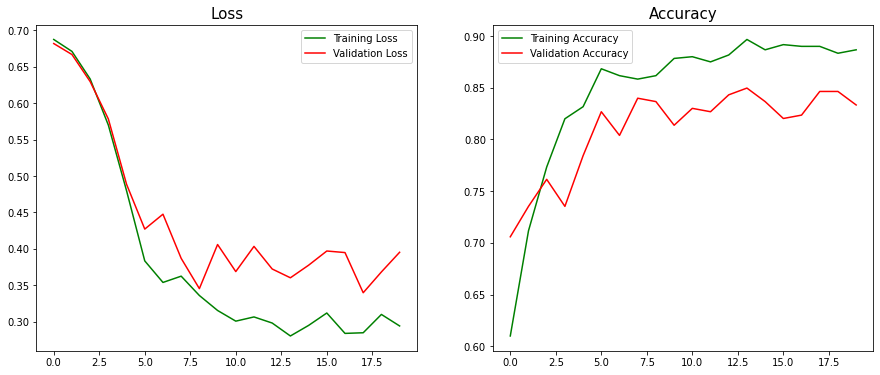

In [79]:
plot_loss_and_accuracy(history_2)

### Evaluating the model

In [96]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
model_2.evaluate(test_data)

4/4 [==============================] - 40s 13s/step - loss: 0.4352 - accuracy: 0.8000


[0.43523281812667847, 0.800000011920929]

In [92]:
predgen = model_2.predict_generator(test_data, steps=len(test_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [94]:
preds_ = np.ravel(np.round(predgen)).astype(int)
preds_

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

In [95]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [88]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [97]:
print(confusion_matrix(test_data.classes, preds_))

[[13 37]
 [17 33]]


In [100]:
print(classification_report(test_data.classes, preds_, target_names = class_names))

              precision    recall  f1-score   support

        Mask       0.43      0.26      0.33        50
    Non_Mask       0.47      0.66      0.55        50

    accuracy                           0.46       100
   macro avg       0.45      0.46      0.44       100
weighted avg       0.45      0.46      0.44       100



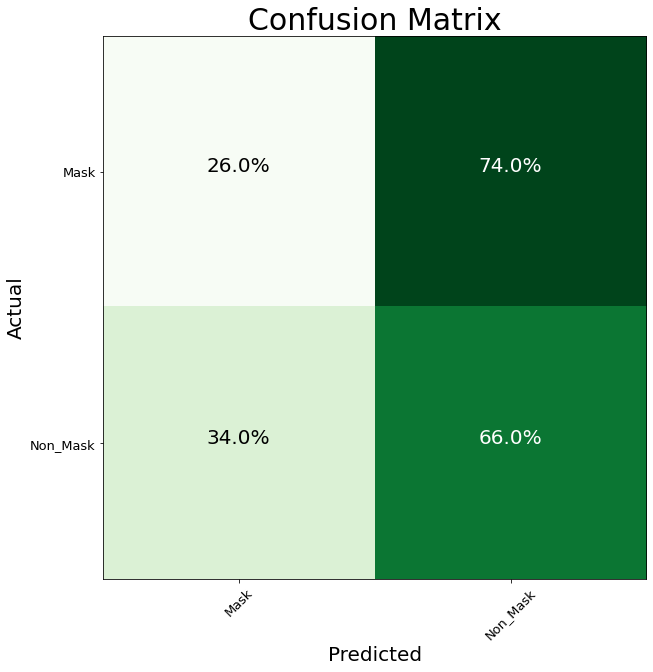

In [120]:
cm = confusion_matrix(test_data.classes, preds_)
cm = cm.astype(float) / cm.sum(axis=1)[: np.newaxis]
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap="Greens")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45, fontsize=13)
plt.yticks(np.arange(len(class_names)), class_names, fontsize=13)
plt.xlabel("Predicted", fontsize =20)
plt.ylabel("Actual", fontsize =20)
plt.title("Confusion Matrix", fontsize=30)
for i in range(2):
    for j in range(2):
       plt.text(i,j, f"{cm[j,i]*100.0}%",  horizontalalignment='center', 
                                fontsize=20,
                                color="white" if cm[j,i]>0.5 else "black") 


### Prediction on custom data (found on the internet)

In [21]:
!wget https://images.indianexpress.com/2021/04/covid-mask-1200.jpg

--2021-06-03 12:46:35--  https://images.indianexpress.com/2021/04/covid-mask-1200.jpg
Resolving images.indianexpress.com (images.indianexpress.com)... 104.81.181.241
Connecting to images.indianexpress.com (images.indianexpress.com)|104.81.181.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60341 (59K) [image/jpeg]
Saving to: ‘covid-mask-1200.jpg’

covid-mask-1200.jpg 100%[===================>]  58.93K  --.-KB/s    in 0.08s   

2021-06-03 12:46:36 (727 KB/s) - ‘covid-mask-1200.jpg’ saved [60341/60341]



In [67]:
!wget https://st.depositphotos.com/1054749/2508/i/600/depositphotos_25087091-stock-photo-outdoor-close-up-portrait-of.jpg

--2021-06-03 13:23:02--  https://st.depositphotos.com/1054749/2508/i/600/depositphotos_25087091-stock-photo-outdoor-close-up-portrait-of.jpg
Resolving st.depositphotos.com (st.depositphotos.com)... 23.6.172.79
Connecting to st.depositphotos.com (st.depositphotos.com)|23.6.172.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37229 (36K) [image/jpeg]
Saving to: ‘depositphotos_25087091-stock-photo-outdoor-close-up-portrait-of.jpg’

depositphotos_25087 100%[===================>]  36.36K  --.-KB/s    in 0.04s   

2021-06-03 13:23:02 (878 KB/s) - ‘depositphotos_25087091-stock-photo-outdoor-close-up-portrait-of.jpg’ saved [37229/37229]



In [65]:
def pred_and_plot(filepath, model):
    """
    Augments the image at filepath and makes prediction using the model
    """

    # Image preprocessing
    img = tf.io.read_file(filepath)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, (512,512))
    img = img/255.

    # Making predictions
    prediction = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(prediction[0,0]).numpy())]

    #plot the predictions
    origimg = plt.imread(filepath)
    plt.figure(figsize=(7,7))
    plt.imshow(origimg)
    plt.axis(False)
    plt.title(pred_class, fontsize=20)


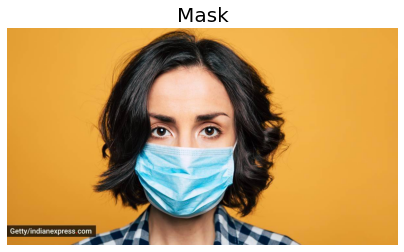

In [66]:
pred_and_plot("/content/drive/MyDrive/Kaggle/covid-mask-1200.jpg", model_2)

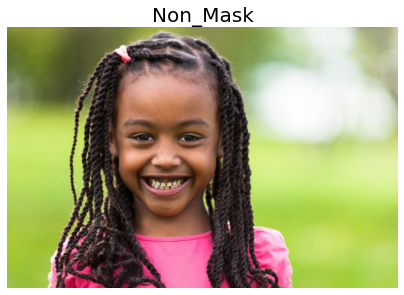

In [68]:
pred_and_plot("/content/drive/MyDrive/Kaggle/depositphotos_25087091-stock-photo-outdoor-close-up-portrait-of.jpg", model_2)

### Saving the model

In [121]:
model_2.save("mask_detection_model")

INFO:tensorflow:Assets written to: mask_detection_model/assets
